# Technical Analysis Report: E-commerce Order Data Analysis

### Introduction

 This report presents a comprehensive analysis of e-commerce order data, focusing on key aspects of customer behavior, operational efficiency, and transaction patterns. In today's competitive e-commerce landscape, understanding customer interactions and internal processes is paramount for strategic decision-making, improving service quality, and driving business growth. This project aims to extract actionable insights from a large dataset of orders to support these objectives.

#### Problem Statement

The e-commerce platform lacks a clear understanding of its customer segments, operational bottlenecks, and the impact of various transaction types on overall business performance. This leads to generalized marketing efforts, unaddressed inefficiencies in order fulfillment, and missed opportunities for targeted interventions.

SMART Goal: By analyzing historical order data, this project aims to segment customers based on their purchasing behavior, identify common reasons for incomplete orders, evaluate employee responsiveness, and uncover key transaction trends within the next 3 months, to provide data-driven recommendations for improving customer retention and operational efficiency.

#### Objectives

The primary objectives of this analysis are to:

Consolidate and Clean Data: Combine raw order data from multiple sources and perform thorough data cleaning, including handling missing values, standardizing data types, and removing erroneous entries.

Analyze Customer Behavior: Segment customers based on their Recency, Frequency, and Monetary value (RFM) to identify loyal, new, at-risk, and restaurant-based customers.

Identify Incomplete Order Reasons: Determine the primary reasons behind incomplete or cancelled orders to pinpoint areas for operational improvement.

Assess Employee Performance: Evaluate employee efficiency and responsiveness based on order handling and response times.

Understand Transaction Patterns: Analyze the distribution of payment types, order types, and the prevalence of discounted transactions.

Provide Actionable Recommendations: Formulate data-driven recommendations to enhance customer experience, optimize operations, and improve overall business performance.

#### Target Audience

This technical analysis report is primarily intended for:

Magna Management: To inform strategic decisions regarding customer retention, marketing campaigns, and operational improvements.

Operations Team: To identify and address inefficiencies in order processing and delivery.

Customer Service Team: To understand common issues leading to incomplete orders and improve customer support.

#### Dataset(s)

The analysis is based on a collection of 50 individual CSV files, each representing e-commerce order data. These files were combined into a single comprehensive dataset for analysis.

Dataset Link: The dataset consists of fl_orders_*.csv files, which are local files located in C:\Users\Dell\Downloads.

#### Data Dictionary (Key Columns Used):


| Column Name      | Description                                                                 | Data Type (after cleaning) |
| :--------------- | :-------------------------------------------------------------------------- | :------------------------- |
| order_id       | Unique identifier for each order.                                           | int                      |
| record_date    | Timestamp when the order was recorded (includes date and time).             | datetime64[ns]           |
| view_date      | Timestamp when the order was viewed/processed (includes date and time).     | datetime64[ns]           |
| view_time      | Time component extracted from view_date.                                  | object (time object)     |
| record_time    | Time component extracted from record_date.                                | object (time object)     |
| record_hour    | Hour component extracted from record_date (0-23).                         | int                      |
| total_price    | Total price of the order.                                                   | float                    |
| paid_amount    | Amount paid by the customer for the order.                                  | float                    |
| discount       | Discount applied to the order.                                              | float                    |
| order_type     | Type of order (e.g., 'delivery', 'pickup', 'dinein').                       | object (string)          |
| payment_type   | Method of payment (e.g., 'Cash', 'Credit Card').                           | object (string)          |
| ip_address     | IP address from which the order was placed.                                 | object (string)          |
| order_status   | Status of the order (0: Incomplete/Cancelled, 1: Successful).               | int                      |
| order_status_2 | Secondary order status (0: Declined by restaurant, 1: Accepted by restaurant, 2: Pending by restaurant). | int                      |
| track_status_3 | Tertiary tracking status (0: order not picked up).                          | int                      |
| rest_id        | Identifier for the restaurant.                                              | int                      |
| pos_session_id | Point-of-sale session ID, often used as an employee identifier.             | int                      |
| response_time  | Calculated time difference between view_date and record_date in minutes.| float                    |
| is_discounted  | Boolean indicating if a discount was applied to the transaction.            | bool                     |
| incomplete_reason | Categorical reason for incomplete orders.                                | object (string)          |
| Recency        | Days since last order (for RFM).                                            | int                      |
| Frequency      | Number of unique orders (for RFM).                                          | int                      |
| Monetary       | Total spend (for RFM).                                                      | float                    |
| R_Score, F_Score, M_Score, RFM_Score | RFM scores and combined score.             | int                      |
| Customer_Segment | Categorical customer segment (e.g., 'Loyal', 'New', 'Lost').              | object (string)          |
| Customer_Type  | Categorical customer type (e.g., 'One Time purchase', 'Repeated customers').| object (string)          |

#### Data Handling

#### Step1: Configuration for Data Loading and Cleaning

###### #Comments added on each block for clarity

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os # Import the os module for path operations
import glob # Import glob for finding multiple files

# Set display options for better output readability
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [17]:
RAW_FILES_DIRECTORY = r'C:\Users\Dell\Downloads' #Change the path to fit your direction
OUTPUT_CLEANED_FILE = 'cleaned_combined_orders.csv' # The single output file after initial preprocessing

# Unneeded columns dropped
COLUMNS_TO_DROP = [
    'paylater_date', 'pay_later', 'order_history', 'paymenttype_id', 'remaining_amount',
    'real_paid_amount', 'offers_list', 'order_ref', 'points_paid_value', 'points_get',
    'points_paid', 'is_editable', 'is_returned', 'void_note', 'void_by', 'void_date',
    'is_void', 'giftcard_used', 'giftcard_rem', 'giftcard_name', 'giftcard_id', 'receiver_name', 'receiver_mobile',
    'order_source', 'delivery_free', 'discount_min_amt', 'area_name', 'address_provided',
    'discount_inc_disitms', 'discount_inc_delivery', 'discount_type', 'discounts_name',
    'pk_car_no', 'email', 'order_synced_date', 'order_synced', 'dispatch_data', 'delivery_time',
    'dispatch_date', 'trk_number', 'courier_id', 'order_dispatched', 'total_fees',
    'fees_amt', 'fees_per', 'sh_id', 'pr_updated', 'receipt_shown', 'order_processed',
    'paid_date', 'is_paid', 'done_date', 'is_done', 'track_status_3_date', 'track_status_2_date', 'track_status_2', 'track_status_1_date',
    'track_status_1', 'order_status_2_date', 'order_status_date', 'delivery_status_date',
    'pr_amount', 'pr_val', 'pr_type', 'pr_code', 'pr_id', 'rec_name', 'sender_name',
    'order_viewed', 'order_manualstatus', 'delivery_date', 'deliverydate_note', 'note',
    'branch_name', 'branch_id', 'block', 'road', 'building', 'floor', 'flat',
    'address_type', 'cust_mobile', 'cust_name', 'num_of_cust', 'order_num'
]


### Step2: Data handling and cleaning 

The data handling process involved several critical steps to ensure the dataset was clean, consistent, and ready for analysis.

##### Data Combination (Step 1.1):

Initially, 50 individual CSV files (fl_orders_*.csv) were identified in the specified raw data directory.

These files were iteratively read into pandas DataFrames and then concatenated into a single master DataFrame. Robust error handling was implemented to skip empty or malformed files, and low_memory=False was used during reading to prevent mixed type warnings in large columns.

A fallback mechanism was included to load a pre-cleaned combined file if the raw files were not found, ensuring the script could still run for analysis.

##### Initial Data Inspection (Step 1.2):

After combination, the first few rows (.head()) and a summary of data types and non-null values (.info()) were displayed to get an initial understanding of the data structure and quality.

##### Column Dropping (Step 1.3):

A predefined list of irrelevant or redundant columns (e.g., paylater_date, order_history, email, address_type, etc.) was identified and dropped from the DataFrame. This reduced dimensionality and focused the dataset on relevant features for the analysis.

##### Essential Type Conversions and Further Cleaning (Step 1.4):

Datetime Conversion: Key timestamp columns (record_date, view_date) were converted to proper datetime objects using pd.to_datetime with errors='coerce' to handle unparseable dates gracefully. These columns were maintained as full datetime objects (including both date and time) to allow for accurate duration calculations.

Time Component Extraction : New columns view_time and record_time were created by extracting only the time component from view_date and record_date respectively. Additionally, record_hour was created to represent the hour of the day (0-23) from record_date, facilitating time-of-day analysis.

Numeric Conversion & Whitespace Stripping : Numerical columns (e.g., order_id, total_price, discount, order_status, order_status_2, track_status_3, pos_session_id) were converted to appropriate numeric types (int or float). Crucially, for integer-like columns, any leading/trailing whitespace was explicitly removed using .str.strip() before conversion to prevent misinterpretation of numerical values (e.g., '1 ' being different from '1'). Missing numerical values were filled with 0.

String Cleaning: Text-based columns (order_type, payment_type, ip_address, order_hash) were converted to string type, leading/trailing whitespace was removed, and 'nan' string representations were replaced with 'Unknown'.

Payment Type Mapping: Abbreviations in the payment_type column (e.g., 'csh', 'bfp') were replaced with more descriptive, clear names (e.g., 'Cash', 'Benefit Pay') for better readability and interpretability.

New Feature: is_discounted: A new boolean column is_discounted was created, set to True if the discount value was greater than 0, and False otherwise.

Duplicate Removal: Exact duplicate rows across all columns were identified and removed from the dataset.

Filtering Erroneous Entries:

Rows containing system-related order_type values (e.g., 'transfer_earning_to_agent') were removed.

Rows with data entry errors in payment_type (e.g., 'job_address') were removed.

Rows where ip_address was 'Unknown' were removed, as these lacked crucial customer identification for RFM analysis.

##### Final Data Inspection (Step 1.5):

After all cleaning and preprocessing steps, the DataFrame's head and info were displayed again to verify the changes, confirm data types, and check for remaining null values.

##### Saving Cleaned Data (Step 1.6):

The fully cleaned and preprocessed DataFrame was saved to a new CSV file (cleaned_combined_orders.csv) to serve as a clean starting point for subsequent analytical tasks, avoiding the need to re-run the intensive cleaning process.

In [20]:

print("--- Step 1: Data Loading and Initial Preprocessing (Combining 50 Files, Dropping Columns, Cleaning) ---")

# --- 1.1 Combine 50 Data Files ---
all_files = glob.glob(os.path.join(RAW_FILES_DIRECTORY, 'fl_orders_*.csv'))
df_list = []
delimiter = ',' 
quote_char = '"' 

if not all_files:
    print(f"Error: No raw CSV files found in '{RAW_FILES_DIRECTORY}'. Please ensure the path is correct.")
    
    try:
        df = pd.read_csv(OUTPUT_CLEANED_FILE, encoding='latin-1', low_memory=False)
        print(f"Falling back to load existing '{OUTPUT_CLEANED_FILE}' as raw files were not found.")
    except FileNotFoundError:
        print(f"Fatal Error: Neither raw files nor '{OUTPUT_CLEANED_FILE}' found. Exiting.")
        exit()
else:
    for f in all_files:
        try:
            temp_df = pd.read_csv(
                f,
                sep=delimiter,
                quotechar=quote_char,
                encoding="UTF-8",
                on_bad_lines='skip', 
                low_memory=False 
            )
            df_list.append(temp_df)
            print(f"Successfully read {os.path.basename(f)}") 
        except pd.errors.EmptyDataError:
            print(f"Warning: {os.path.basename(f)} is empty and was skipped.")
        except Exception as e:
            print(f"An unexpected error occurred while reading {os.path.basename(f)}: {e}")

    if df_list:
        df = pd.concat(df_list, ignore_index=True)
        print(f"\nSuccessfully combined {len(df_list)} raw files into a single DataFrame.")
    else:
        print("No dataframes were successfully loaded from raw files. Cannot proceed with combining.")
        # If no raw files loaded, try to load the pre-cleaned file as a fallback
        try:
            df = pd.read_csv(OUTPUT_CLEANED_FILE, encoding='latin-1', low_memory=False)
            print(f"Falling back to load existing '{OUTPUT_CLEANED_FILE}'.")
        except FileNotFoundError:
            print(f"Fatal Error: Neither raw files nor '{OUTPUT_CLEANED_FILE}' found. Exiting.")
            exit()

print("\n--- 1.2 Initial Data Inspection (Combined/Loaded Data) ---")
#print("DataFrame Head after initial load/combine:")
#print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
#print("\nDataFrame Info after initial load/combine:")
df.info()


print("\n--- 1.3 Drop Unnecessary Columns ---")
existing_columns_to_drop = [col for col in COLUMNS_TO_DROP if col in df.columns]
non_existing_columns = [col for col in COLUMNS_TO_DROP if col not in df.columns]

if non_existing_columns:
    print(f"Warning: The following columns were requested for deletion but were not found: {', '.join(non_existing_columns)}")

initial_columns_count = df.shape[1]
df.drop(columns=existing_columns_to_drop, errors='ignore', inplace=True)
dropped_count = initial_columns_count - df.shape[1]

print(f"Successfully deleted {dropped_count} columns from the dataset.")
print(f"Remaining columns: {df.shape[1]}")
print("New columns in the dataset:")
print(df.columns.tolist())


print("\n--- 1.4 Essential Type Conversions and Further Cleaning ---")

# --- Datetime Conversions ---

datetime_cols = ['record_date', 'view_date']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', format='mixed')
    else:
        print(f"Warning: Datetime column '{col}' not found for conversion.")

# Add print statements to confirm dtypes after conversion
print("\nData types of 'record_date' and 'view_date' after conversion:")
if 'record_date' in df.columns:
    print(f"record_date dtype: {df['record_date'].dtype}")
if 'view_date' in df.columns:
    print(f"view_date dtype: {df['view_date'].dtype}")

# --- Time Component Extraction ---
# These columns will be 'object' (time objects)
if 'view_date' in df.columns:
    df['view_time'] = df['view_date'].dt.time
    print("Created 'view_time' column by extracting time from 'view_date'.")
else:
    print("Skipping 'view_time' column creation as 'view_date' is missing.")

if 'record_date' in df.columns:
    df['record_time'] = df['record_date'].dt.time
    # 'record_hour' will be an integer
    df['record_hour'] = df['record_date'].dt.hour
    print("Created 'record_time' and 'record_hour' columns by extracting time/hour from 'record_date'.")
else:
    print("Skipping 'record_time' and 'record_hour' column creation as 'record_date' is missing.")

numeric_cols = [
    'order_id', 'total_price', 'delivery_charge', 'discount', 'tax', 'total_tax',
    'total_tax_inc', 'discount_total', 'subtotal', 'paid_amount', 'total_change',
    'rest_id', 'area_id', 'member_id', 'order_status', 'order_status_2', 'track_status_3',
    'pos_session_id', 'loc_lat', 'loc_lon'
]

for col in numeric_cols:
    if col in df.columns:
        if col in ['order_id', 'rest_id', 'area_id', 'member_id', 'order_status', 'order_status_2', 'track_status_3', 'pos_session_id']:
            # Ensure it's treated as string first to strip whitespace and .0, then convert to numeric
            df[col] = pd.to_numeric(df[col].astype(str).str.strip().str.replace(r'\.0$', '', regex=True), errors='coerce').fillna(0).astype(int)
        else:
            # For other numeric columns (like prices, charges, etc.), convert to float
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0.0)
    else:
        print(f"Warning: Numeric column '{col}' not found for conversion.")

# --- String Cleaning & Filling NaNs for relevant columns ---
string_cols = ['order_type', 'payment_type', 'ip_address', 'order_hash'] # incomplete_reason, Customer_Segment, Customer_Type are created later
for col in string_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).replace('nan', 'Unknown').fillna('Unknown').str.strip()
    else:
        print(f"Warning: String column '{col}' not found for cleaning.\n")

# --- NEW: Replace payment_type abbreviations with full names ---
if 'payment_type' in df.columns:
    payment_type_mapping = {
        'csh': 'Cash',
        'bfp': 'Benefit Pay',
        'app': 'Apply Pay',
        'spl': 'Split Payment',
        'ccd': 'Credit Card',
        'dcd': 'Debit Card',
        'csd': 'Cash on Delivery'
    }
    df['payment_type'] = df['payment_type'].replace(payment_type_mapping)
    print("Replaced payment_type abbreviations with full names.")
else:
    print("Skipping payment_type abbreviation replacement as 'payment_type' column is missing.")

# --- NEW: Create 'is_discounted' column (Boolean) --- Changed to Text in Power Bi Analysis
if 'discount' in df.columns:
    # Ensure 'discount' is numeric before comparison for this boolean flag
    if not pd.api.types.is_numeric_dtype(df['discount']):
        df['discount'] = pd.to_numeric(df['discount'], errors='coerce').fillna(0.0)
    df['is_discounted'] = np.where(df['discount'] > 0, True, False)
    print("Created 'is_discounted' column based on 'discount' value.")
else:
    print("Skipping 'is_discounted' column creation as 'discount' column is missing.")


# Remove duplicates across all columns
initial_rows_before_dedup = len(df)
df.drop_duplicates(inplace=True)
if len(df) < initial_rows_before_dedup:
    print(f"Removed {initial_rows_before_dedup - len(df)} duplicate rows.")

# Remove system-related order types if they exist
if 'order_type' in df.columns:
    initial_rows_before_filter = len(df)
    df = df[~df['order_type'].astype(str).str.contains('transfer_earning_to_agent', na=False)].copy()
    if len(df) < initial_rows_before_filter:
        print(f"Removed {initial_rows_before_filter - len(df)} rows with 'transfer_earning_to_agent' order type.")

# Remove data entry errors in payment_type if they exist
if 'payment_type' in df.columns:
    initial_rows_before_filter = len(df)
    df = df[~df['payment_type'].astype(str).str.contains('job_address', na=False)].copy()
    if len(df) < initial_rows_before_filter:
        print(f"Removed {initial_rows_before_filter - len(df)} rows with 'job_address' payment type.")

# --- Delete rows where ip_address is 'Unknown' ---
if 'ip_address' in df.columns:
    initial_rows = len(df)
    df = df[df['ip_address'] != 'Unknown'].copy()
    rows_deleted = initial_rows - len(df)
    if rows_deleted > 0:
        print(f"Deleted {rows_deleted} rows with 'Unknown' ip_address.")
    else:
        print("No rows with 'Unknown' ip_address found for deletion.")



print("\n--- 1.5 Final Data Inspection after all Cleaning Steps ---")
print("DataFrame Head after all cleaning steps:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nDataFrame Info after all cleaning steps:")
df.info()


print(f"\n--- 1.6 Saving Cleaned Data to '{OUTPUT_CLEANED_FILE}' ---")
df.to_csv(OUTPUT_CLEANED_FILE, index=False)
print(f"Cleaned and preprocessed data saved to '{OUTPUT_CLEANED_FILE}' for further analysis.")

--- Step 1: Data Loading and Initial Preprocessing (Combining 50 Files, Dropping Columns, Cleaning) ---
Successfully read fl_orders_1.csv
Successfully read fl_orders_10.csv
Successfully read fl_orders_11.csv
Successfully read fl_orders_12.csv
Successfully read fl_orders_13.csv
Successfully read fl_orders_14.csv
Successfully read fl_orders_15.csv
Successfully read fl_orders_16.csv
Successfully read fl_orders_17.csv
Successfully read fl_orders_18.csv
Successfully read fl_orders_19.csv
Successfully read fl_orders_2.csv
Successfully read fl_orders_20.csv
Successfully read fl_orders_21.csv
Successfully read fl_orders_22.csv
Successfully read fl_orders_23.csv
Successfully read fl_orders_24.csv
Successfully read fl_orders_25.csv
Successfully read fl_orders_26.csv
Successfully read fl_orders_27.csv
Successfully read fl_orders_28.csv
Successfully read fl_orders_29.csv
Successfully read fl_orders_3.csv
Successfully read fl_orders_30.csv
Successfully read fl_orders_31.csv
Successfully read fl_ord

### Analysis and Findings

#### Part 2: General Exploratory Data Analysis (EDA) - Visualizations

The initial EDA provided a broad overview of the dataset's characteristics. Key findings include:

Payment Methods: Cash and Benefit Pay are the most dominant payment methods, indicating a preference for traditional and local digital payment options. Other methods like Credit Card and Apple Pay are used less frequently.

Order Types: Delivery orders significantly outnumber pickup and dine-in, highlighting the platform's primary service model and the strong demand for delivery services.

Total Price Distribution: The majority of orders fall within a lower price range, typically under 200 units, with a long tail indicating some high-value outlier transactions. This suggests a large base of smaller, frequent orders.

Average Price by Order Type: Dine-in orders, despite being fewer in number, tend to have a higher average total price compared to delivery and pickup. This could indicate larger group orders or more premium experiences for dine-in.

Orders Over Time: Order volume shows a relatively steady trend over the observed period with some daily fluctuations, suggesting consistent demand for the e-commerce platform's services.

Top Restaurants: A few restaurants account for a disproportionately high number of orders, indicating their popularity or strategic importance to the platform's overall volume. These top performers are key business partners.

Order Status: A vast majority of orders are successful (status 1), indicating good operational efficiency. However, a notable percentage (around 10-15%) are incomplete/cancelled (status 0), warranting further investigation to reduce churn.

Discount Values: Discounts are frequently applied, mostly small amounts, typically under 50 units. However, some larger discounts are also present, which might be part of specific promotional campaigns.


--- Part 2: General Exploratory Data Analysis (EDA) - Visualizations ---


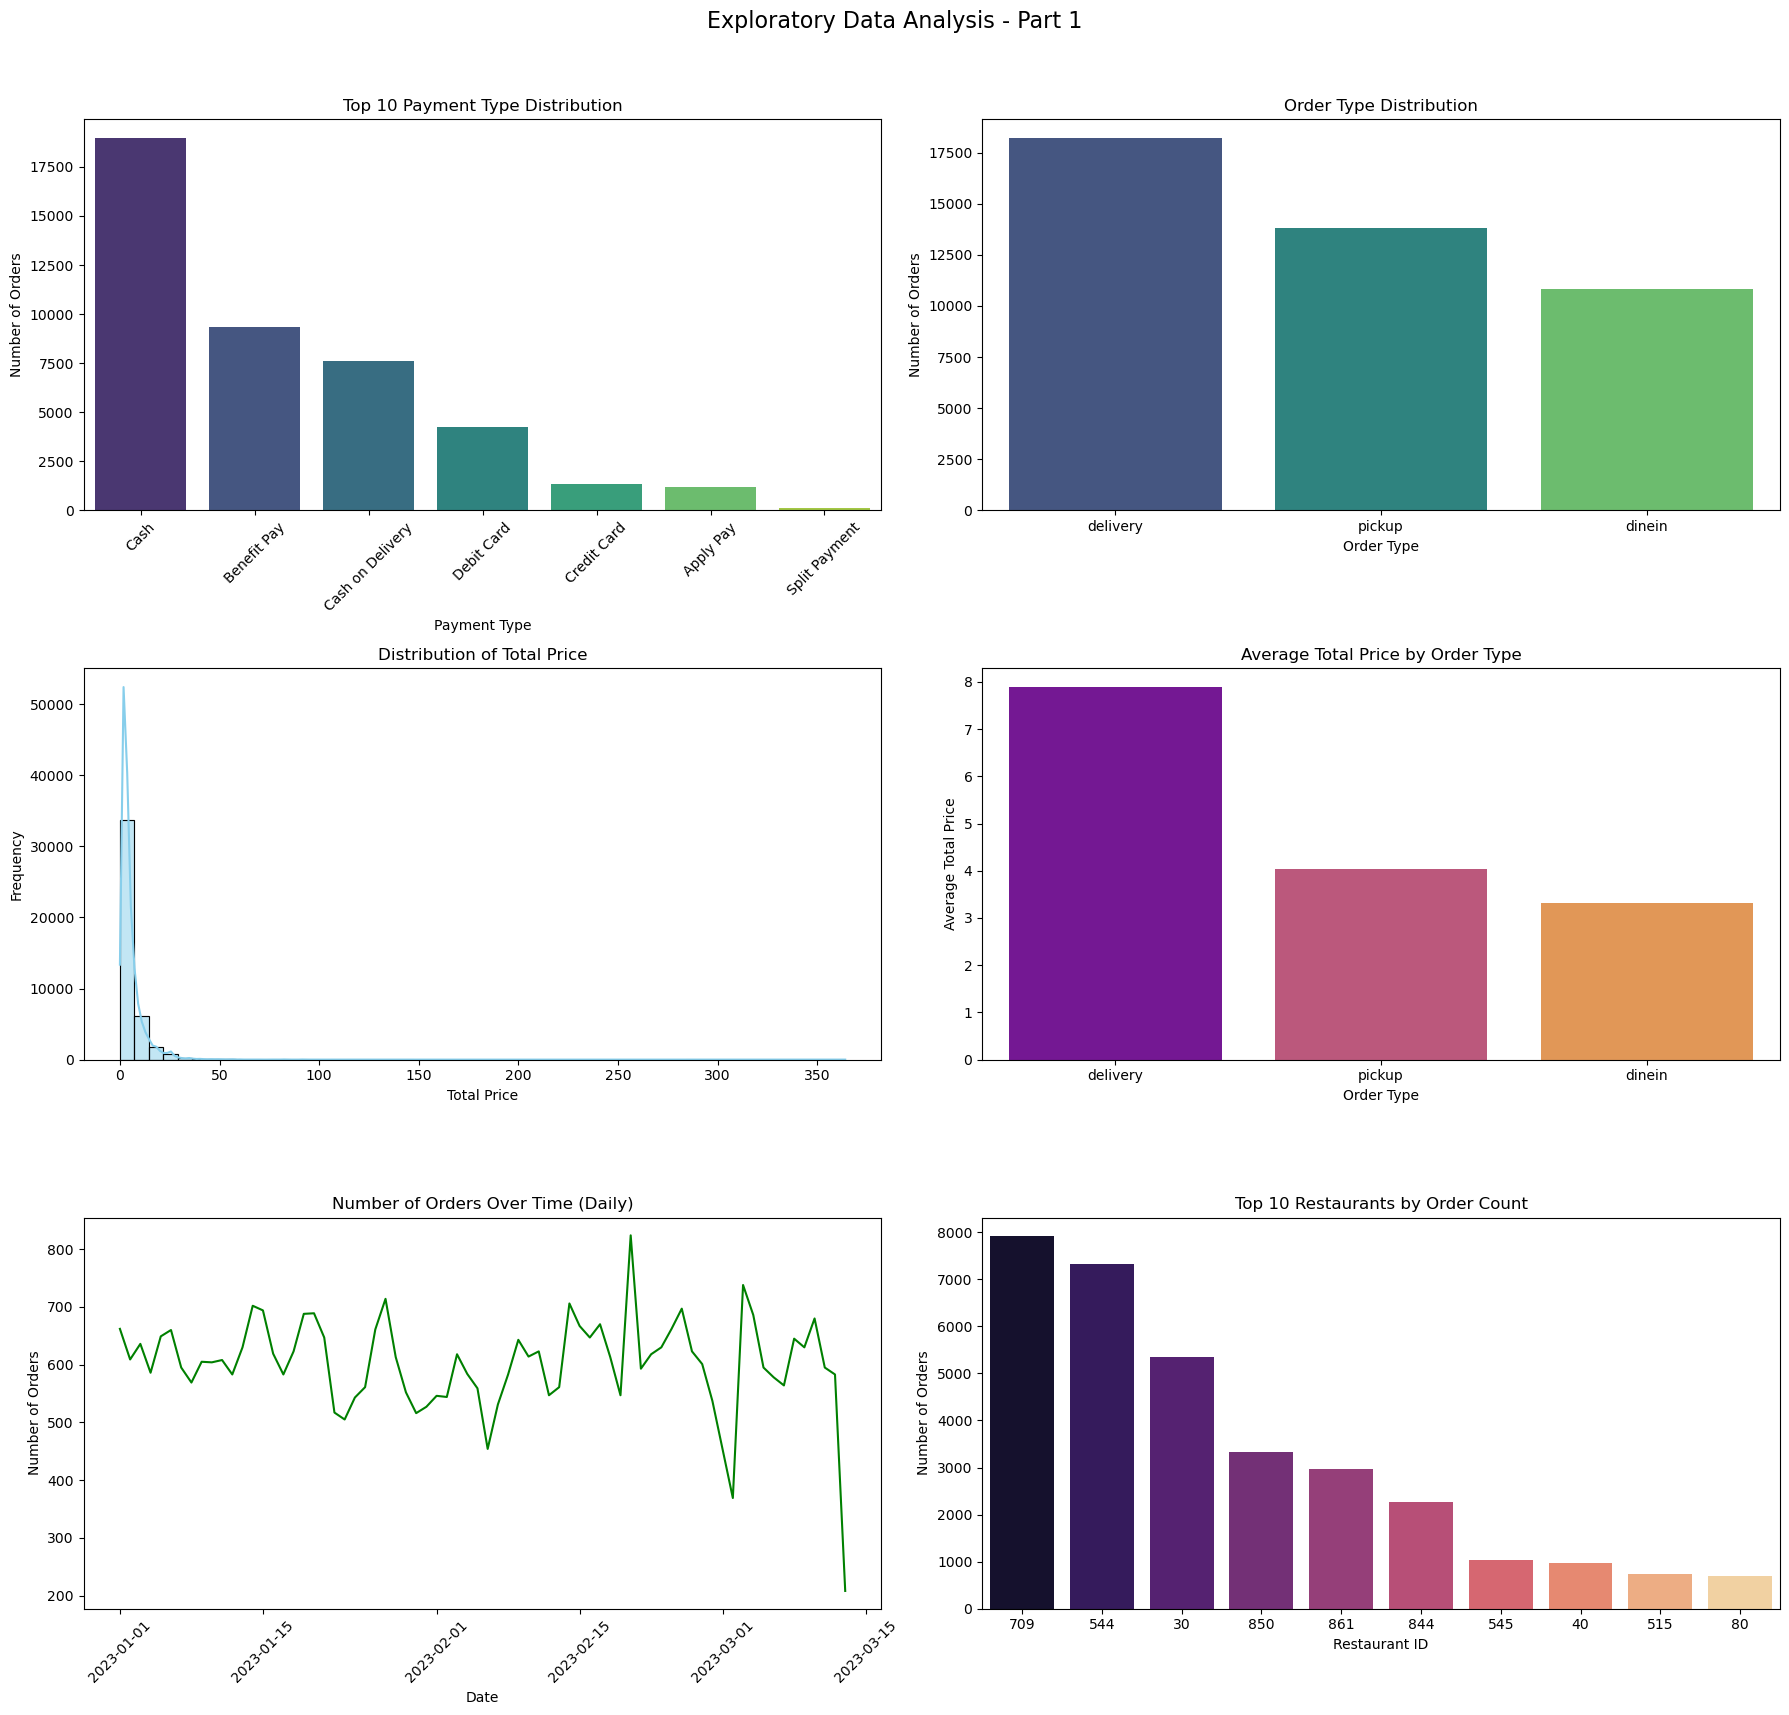

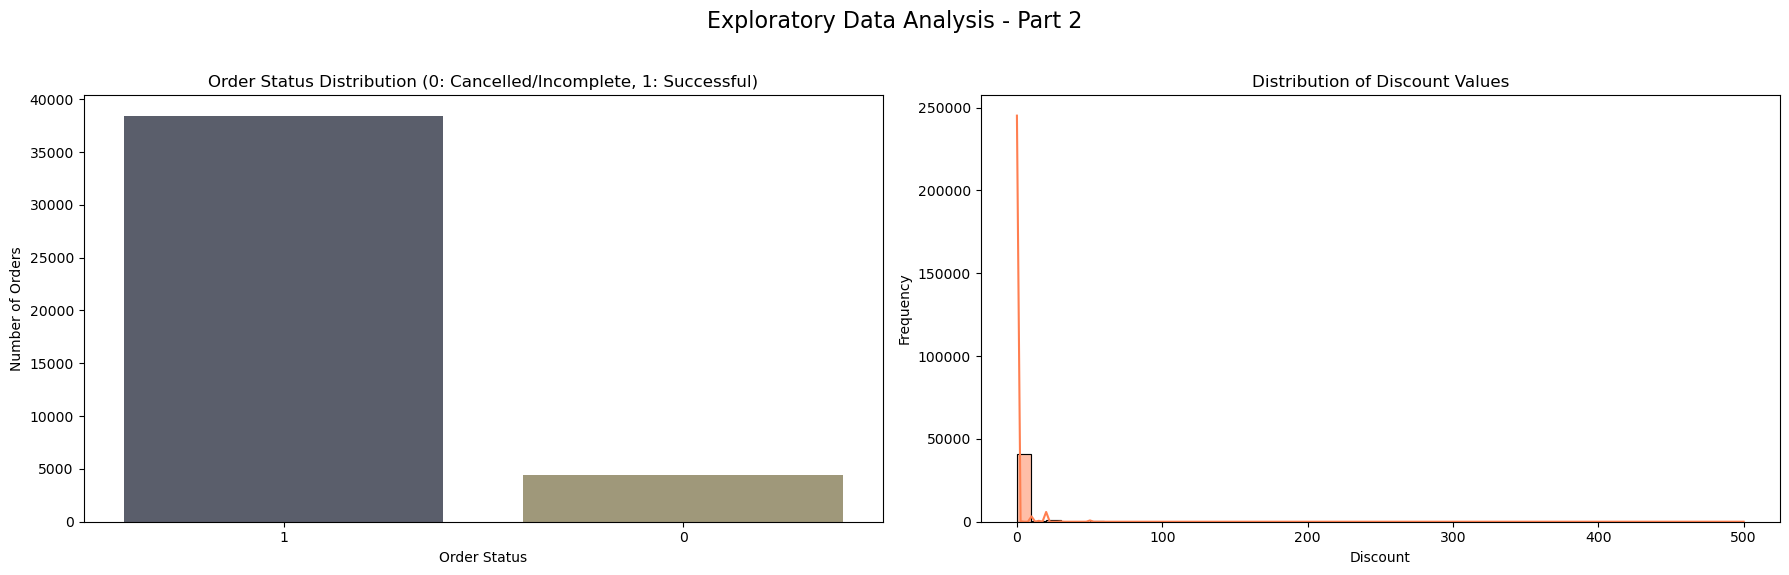

In [23]:

print("\n--- Part 2: General Exploratory Data Analysis (EDA) - Visualizations ---") 

# Create a figure with subplots for the first set of visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Exploratory Data Analysis - Part 1', fontsize=16)

# 1: What are the most popular payment methods?
if 'payment_type' in df.columns:
    payment_type_counts = df['payment_type'].value_counts().head(10)
    sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, ax=axes[0, 0], palette='viridis', hue=payment_type_counts.index, legend=False)
    axes[0, 0].set_title('Top 10 Payment Type Distribution')
    axes[0, 0].set_xlabel('Payment Type')
    axes[0, 0].set_ylabel('Number of Orders')
    axes[0, 0].tick_params(axis='x', rotation=45)
else:
    axes[0, 0].set_title('Payment Type Distribution (N/A)')
    axes[0, 0].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes[0, 0].transAxes)

# 2: How are orders distributed across 'delivery', 'pickup', and 'dinein'?
if 'order_type' in df.columns:
    order_type_counts = df['order_type'].value_counts()
    sns.barplot(x=order_type_counts.index, y=order_type_counts.values, ax=axes[0, 1], palette='viridis', hue=order_type_counts.index, legend=False)
    axes[0, 1].set_title('Order Type Distribution')
    axes[0, 1].set_xlabel('Order Type')
    axes[0, 1].set_ylabel('Number of Orders')
else:
    axes[0, 1].set_title('Order Type Distribution (N/A)')
    axes[0, 1].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes[0, 1].transAxes)


# 3: What is the distribution of 'total_price'? Are there any outliers?
if 'total_price' in df.columns:
    sns.histplot(df['total_price'], bins=50, kde=True, ax=axes[1, 0], color='skyblue')
    axes[1, 0].set_title('Distribution of Total Price')
    axes[1, 0].set_xlabel('Total Price')
    axes[1, 0].set_ylabel('Frequency')
else:
    axes[1, 0].set_title('Distribution of Total Price (N/A)')
    axes[1, 0].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes[1, 0].transAxes)


# 4: What is the average 'total_price' for each 'order_type'?
if 'order_type' in df.columns and 'total_price' in df.columns:
    avg_price_by_order_type = df.groupby('order_type')['total_price'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_price_by_order_type.index, y=avg_price_by_order_type.values, ax=axes[1, 1], palette='plasma', hue=avg_price_by_order_type.index, legend=False)
    axes[1, 1].set_title('Average Total Price by Order Type')
    axes[1, 1].set_xlabel('Order Type')
    axes[1, 1].set_ylabel('Average Total Price')
else:
    axes[1, 1].set_title('Average Total Price by Order Type (N/A)')
    axes[1, 1].text(0.5, 0.5, 'Required columns not found', horizontalalignment='center', verticalalignment='center', transform=axes[1, 1].transAxes)


# 5: How do the number of orders change over time (daily)?
if 'record_date' in df.columns and 'order_id' in df.columns:
    orders_daily = df.groupby(df['record_date'].dt.date)['order_id'].count()
    orders_daily.plot(ax=axes[2, 0], color='green')
    axes[2, 0].set_title('Number of Orders Over Time (Daily)')
    axes[2, 0].set_xlabel('Date')
    axes[2, 0].set_ylabel('Number of Orders')
    axes[2, 0].tick_params(axis='x', rotation=45)
else:
    axes[2, 0].set_title('Number of Orders Over Time (N/A)')
    axes[2, 0].text(0.5, 0.5, 'Required columns not found', horizontalalignment='center', verticalalignment='center', transform=axes[2, 0].transAxes)


# 6: Which restaurants have the most orders?
if 'rest_id' in df.columns:
    top_restaurants_by_count = df['rest_id'].value_counts().head(10)
    sns.barplot(x=top_restaurants_by_count.index.astype(str), y=top_restaurants_by_count.values, ax=axes[2, 1], palette='magma', hue=top_restaurants_by_count.index.astype(str), legend=False)
    axes[2, 1].set_title('Top 10 Restaurants by Order Count')
    axes[2, 1].set_xlabel('Restaurant ID')
    axes[2, 1].set_ylabel('Number of Orders')
else:
    axes[2, 1].set_title('Top 10 Restaurants by Order Count (N/A)')
    axes[2, 1].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes[2, 1].transAxes)


# Adjust layout and save the first set of plots
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
# plt.savefig('eda_plots_part1.png') # Uncomment to save plots
plt.show()

# Create a second figure for additional plots
fig2, axes2 = plt.subplots(1, 2, figsize=(18, 6))
fig2.suptitle('Exploratory Data Analysis - Part 2', fontsize=16)

# 7: What is the distribution of order statuses (0: Cancelled/Incomplete, 1: Successful)?
if 'order_status' in df.columns:
    order_status_counts = df['order_status'].value_counts()
    sns.barplot(x=order_status_counts.index.astype(str), y=order_status_counts.values, ax=axes2[0], palette='cividis', hue=order_status_counts.index.astype(str), legend=False)
    axes2[0].set_title('Order Status Distribution (0: Cancelled/Incomplete, 1: Successful)')
    axes2[0].set_xlabel('Order Status')
    axes2[0].set_ylabel('Number of Orders')
else:
    axes2[0].set_title('Order Status Distribution (N/A)')
    axes2[0].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes2[0].transAxes)


# 8: What is the distribution of discount values?
if 'discount' in df.columns:
    sns.histplot(df['discount'], bins=50, kde=True, ax=axes2[1], color='coral')
    axes2[1].set_title('Distribution of Discount Values')
    axes2[1].set_xlabel('Discount')
    axes2[1].set_ylabel('Frequency')
else:
    axes2[1].set_title('Distribution of Discount Values (N/A)')
    axes2[1].text(0.5, 0.5, 'Column not found', horizontalalignment='center', verticalalignment='center', transform=axes2[1].transAxes)


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
# plt.savefig('eda_plots_part2.png') # Uncomment to save plots
plt.show()



#### Part 3: Incomplete Orders Analysis
Analysis of incomplete orders (where order_status is 0) revealed specific reasons for non-completion, categorized with refined logic:

Completed Order (Paid in Restaurant): This category specifically captures dine-in orders that have a paid_amount greater than zero. While order_status might be 0, for dine-in, a paid amount indicates a successful transaction at the restaurant.

Declined by Restaurant: These are incomplete orders (order_status = 0) that were explicitly declined by the restaurant (order_status_2 = 0) for delivery or pickup types. This points to direct rejections from the restaurant side.

Delivery Company Did Not Initiate: This category identifies incomplete orders (order_status = 0) where the restaurant accepted the order (order_status_2 = 1), but the delivery process stalled because the order was not picked up by the delivery company (track_status_3 = 0) for delivery or pickup types. This highlights issues in the hand-off to delivery.

Pending Restaurant Response: This represents incomplete orders (order_status = 0) that are currently pending at the restaurant (order_status_2 = 2) for delivery or pickup types. This is a crucial bottleneck where the restaurant has not yet taken action on the order.

Other/Unknown Incompletion Reason: This serves as a catch-all for any incomplete orders that do not fit the specific criteria of the above categories, indicating areas that might require further manual investigation or more granular data.

The refined categorization provides a clearer picture of where orders are failing, allowing for more targeted operational improvements. For instance, a high count in "Pending Restaurant Response" suggests issues with restaurant responsiveness or system integration, while "Delivery Company Did Not Initiate" points to logistics challenges


--- Part 3: Incomplete Orders Analysis ---

Incomplete Orders Head with Reasons:
| order_id   | order_status   | order_status_2   | track_status_3   | order_type   | paid_amount   | incomplete_reason                    |
|:-----------|:---------------|:-----------------|:-----------------|:-------------|:--------------|:-------------------------------------|
| 721167     | 0              | 2                | 0                | dinein       | 0.2           | Completed Order (Paid in Restaurant) |
| 721186     | 0              | 0                | 0                | delivery     | 0             | Declined by Restaurant               |
| 721201     | 0              | 0                | 0                | delivery     | 0             | Declined by Restaurant               |
| 721210     | 0              | 0                | 0                | delivery     | 0             | Declined by Restaurant               |
| 721219     | 0              | 0                | 0                | delivery

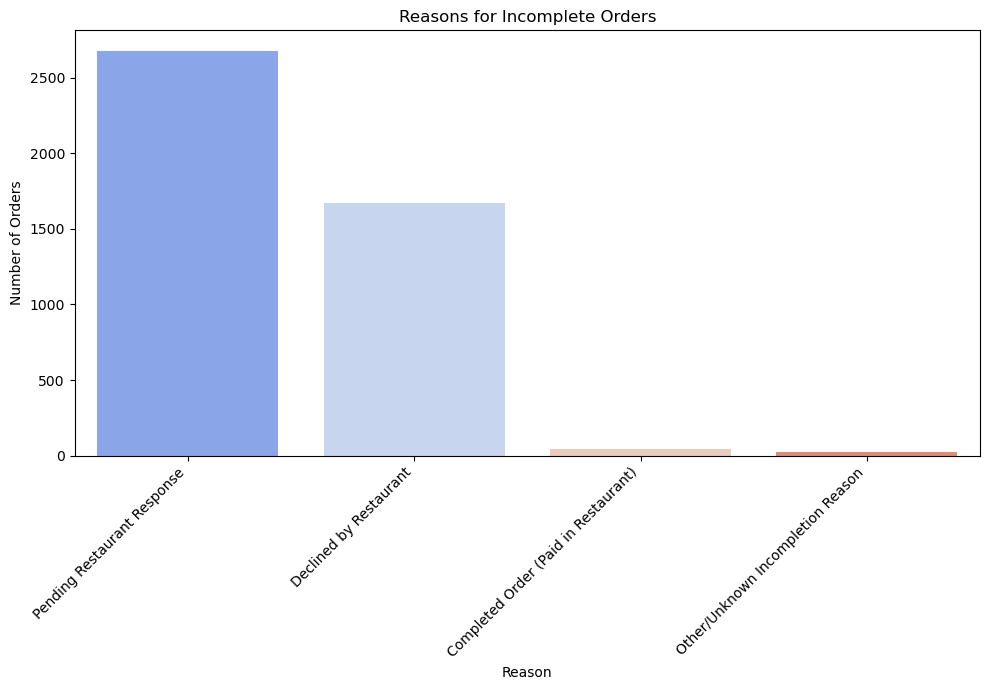

In [25]:
print("\n--- Part 3: Incomplete Orders Analysis ---") 
required_cols_incomplete = ['order_status', 'order_status_2', 'track_status_3', 'order_type', 'paid_amount']
if all(col in df.columns for col in required_cols_incomplete):
    if not pd.api.types.is_numeric_dtype(df['paid_amount']):
        df['paid_amount'] = pd.to_numeric(df['paid_amount'], errors='coerce').fillna(0.0)
        print("Warning: 'paid_amount' column was not numeric; converted it for incomplete order analysis.")

    # Convert order_type to string
    df['order_type_lower'] = df['order_type'].astype(str).str.lower()


    df['incomplete_reason'] = 'Other/Unknown Incompletion Reason'

    conditions = [
        # Rule 1: Completed Order (Paid in Restaurant) - Dine-in orders with paid_amount > 0
        # This is a completed status for dine-in, regardless of order_status, as it implies payment at the restaurant.
        (df['order_type_lower'] == 'dinein') & (df['paid_amount'] > 0),

        # Rule 2: Declined by Restaurant
        # Applies to incomplete orders (order_status == 0) where the restaurant explicitly declined (order_status_2 == 0)
        # for delivery or pickup types.
        (df['order_status_2'] == 0) &
        (df['order_status'] == 0) &
        (df['order_type_lower'].isin(['delivery', 'pickup'])),

        # Rule 3: Delivery Company Did Not Initiate
        # Applies to incomplete orders (order_status == 0) where the restaurant accepted (order_status_2 == 1),
        # but the order was not picked up by the delivery company (track_status_3 == 0) for delivery/pickup types.
        (df['order_status'] == 0) &
        (df['order_status_2'] == 1) & # Restaurant accepted
        (df['order_type_lower'].isin(['delivery', 'pickup'])) &
        (df['track_status_3'] == 0), # Order not picked up by delivery company

        # Rule 4: Pending Restaurant Response
        # Applies to incomplete orders (order_status == 0) that are pending at the restaurant (order_status_2 == 2)
        # for delivery or pickup types. This captures the primary "waiting for restaurant" state.
        (df['order_status_2'] == 2) &
        (df['order_status'] == 0) &
        (df['order_type_lower'].isin(['delivery', 'pickup'])),

        # Rule 5: Cancelled by Customer
        # This rule infers customer cancellation for incomplete orders (status 0) that were accepted by the restaurant (status_2 == 1)
        # and where the delivery tracking status is NOT 0 (meaning delivery was initiated or not relevant, but the order still became incomplete).
        (df['order_status'] == 0) &
        (df['order_status_2'] == 1) & # Restaurant accepted
        (df['order_type_lower'].isin(['delivery', 'pickup'])) &
        (df['track_status_3'] != 0) # Delivery was initiated or not relevant, but order still incomplete
    ]

    choices = [
        'Completed Order (Paid in Restaurant)',
        'Declined by Restaurant',
        'Delivery Company Did Not Initiate',
        'Pending Restaurant Response',
        'Cancelled by Customer' # New choice
    ]

    # Default for now will be 'Other/Unknown Incompletion Reason'.
    df['incomplete_reason'] = np.select(conditions, choices, default='Other/Unknown Incompletion Reason')

    # handle the general 'Completed' status for orders where order_status is 1
    df.loc[
        (df['order_status'] == 1) &
        (df['incomplete_reason'] == 'Other/Unknown Incompletion Reason'), # Only apply if still default
        'incomplete_reason'
    ] = 'Completed'

    # For any remaining orders where order_status is 0 but no specific rule above applied,
    # they will retain the 'Other/Unknown Incompletion Reason' default.

    # Remove the temporary column
    df.drop(columns=['order_type_lower'], inplace=True, errors='ignore')

    incomplete_orders = df[df['order_status'] == 0].copy()

    if not incomplete_orders.empty:
        print("\nIncomplete Orders Head with Reasons:")
        print(incomplete_orders[['order_id', 'order_status', 'order_status_2', 'track_status_3', 'order_type', 'paid_amount', 'incomplete_reason']].head(20).to_markdown(index=False, numalign="left", stralign="left"))

        plt.figure(figsize=(10, 7))
        reason_counts = incomplete_orders['incomplete_reason'].value_counts()
        sns.barplot(x=reason_counts.index, y=reason_counts.values, hue=reason_counts.index, palette='coolwarm', legend=False)
        plt.title('Reasons for Incomplete Orders')
        plt.xlabel('Reason')
        plt.ylabel('Number of Orders')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('incomplete_orders_reasons.png')
        plt.show()

    else:
        print("No incomplete orders (order_status == 0) found in the dataset to analyze.")
else:
    print("One or more columns required for Incomplete Orders Analysis (order_status, order_status_2, track_status_3, order_type, paid_amount) are missing.")


#### Part 4: RFM Analysis & Customer Segmentation (by IP Address)

RFM analysis, using IP address as a proxy for customer, provided valuable insights into customer value:

Recency, Frequency, Monetary Scores: The distribution of R, F, and M scores shows a healthy mix of recent, frequent, and high-spending customers, but also a segment of less engaged users. Most customers have made an order within the last 100 days (high Recency scores), and a significant number have made multiple purchases (higher Frequency scores) and accumulated substantial total spending (higher Monetary scores).

Customer Segments: The 'Loyal Customers' and 'Potential Loyalist' segments combined represent a significant portion, indicating a strong existing customer base. This is crucial for sustained business. The 'Lost/Churned Customer' segment is also substantial, highlighting a need for re-engagement strategies to reactivate these users. 'New Customers' are a smaller but important group for growth, and effective onboarding is vital. The 'Restaurant' segment, specifically identified by dine-in orders, represents a distinct customer group that might require different engagement strategies, potentially for B2B relationships rather than individual consumers.


--- Part 4: RFM Analysis & Customer Segmentation (by IP Address) ---

RFM Metrics Head (by IP Address):

| ip_address      | Recency   | Frequency   | Monetary   | has_dinein_order   |
|:----------------|:----------|:------------|:-----------|:-------------------|
| 102.12.76.116   | 51        | 1           | 25.1       | False              |
| 102.188.4.15    | 19        | 2           | 12.4       | False              |
| 104.149.137.178 | 63        | 1           | 4.51       | False              |
| 104.243.212.153 | 70        | 1           | 9          | False              |
| 104.28.106.15   | 18        | 13          | 138.808    | False              |

RFM Metrics with Scores and Segment Head (by IP Address):

| ip_address      | Recency   | Frequency   | Monetary   | has_dinein_order   | R_Score   | F_Score   | M_Score   | RFM_Score   | Customer_Segment   |
|:----------------|:----------|:------------|:-----------|:-------------------|:----------|:----------|:----------|:-------

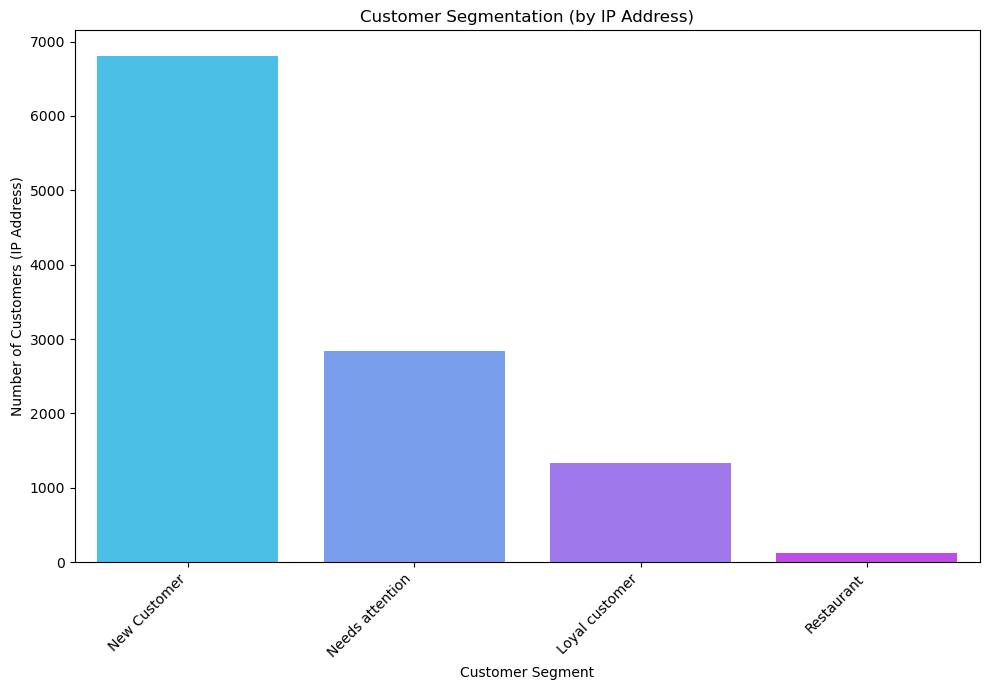

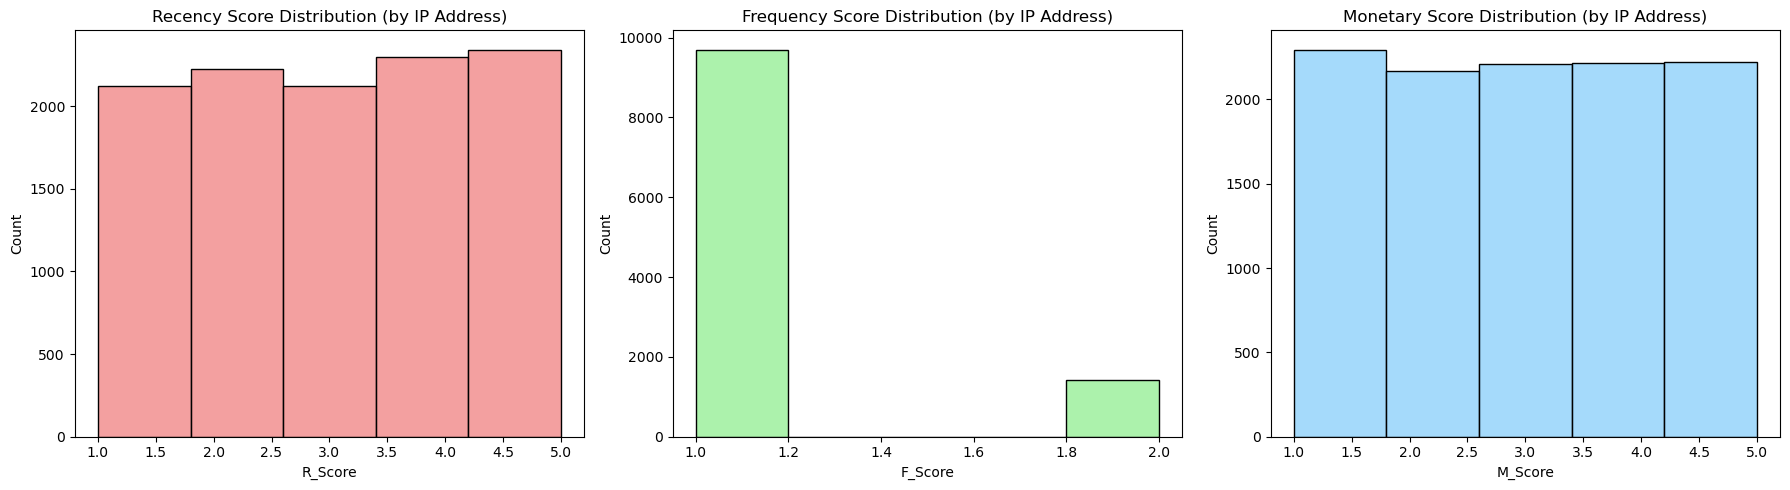

In [27]:


print("\n--- Part 4: RFM Analysis & Customer Segmentation (by IP Address) ---") 
required_cols_rfm = ['ip_address', 'record_date', 'total_price', 'order_id', 'order_type']
if all(col in df.columns for col in required_cols_rfm):
    if not pd.api.types.is_datetime64_any_dtype(df['record_date']):
        df['record_date'] = pd.to_datetime(df['record_date'], errors='coerce', format='mixed')
        print("Warning: 'record_date' column was not datetime; converted it for RFM analysis.")

    rfm_df = df.dropna(subset=['ip_address', 'record_date', 'total_price', 'order_id', 'order_type']).copy()

    if not rfm_df.empty:
        snapshot_date = rfm_df['record_date'].max() + pd.Timedelta(days=1)

        rfm_metrics = rfm_df.groupby('ip_address').agg(
            Recency=('record_date', lambda date: (snapshot_date - date.max()).days),
            Frequency=('order_id', 'nunique'),
            Monetary=('total_price', 'sum'),
            has_dinein_order=('order_type', lambda x: (x.astype(str).str.lower() == 'dinein').any())
        ).reset_index()

        print("\nRFM Metrics Head (by IP Address):\n")
        print(rfm_metrics.head().to_markdown(index=False, numalign="left", stralign="left"))

        if len(rfm_metrics['Recency'].unique()) > 1:
            rfm_metrics['R_Score'] = pd.qcut(rfm_metrics['Recency'], q=5, labels=False, duplicates='drop')
            max_r_score = rfm_metrics['R_Score'].max()
            rfm_metrics['R_Score'] = max_r_score - rfm_metrics['R_Score'] + 1
        else:
            rfm_metrics['R_Score'] = 3

        if len(rfm_metrics['Frequency'].unique()) > 1:
            rfm_metrics['F_Score'] = pd.qcut(rfm_metrics['Frequency'], q=5, labels=False, duplicates='drop') + 1
        else:
            rfm_metrics['F_Score'] = 3

        if len(rfm_metrics['Monetary'].unique()) > 1:
            rfm_metrics['M_Score'] = pd.qcut(rfm_metrics['Monetary'], q=5, labels=False, duplicates='drop') + 1
        else:
            rfm_metrics['M_Score'] = 3

        rfm_metrics['R_Score'] = rfm_metrics['R_Score'].astype(int)
        rfm_metrics['F_Score'] = rfm_metrics['F_Score'].astype(int)
        rfm_metrics['M_Score'] = rfm_metrics['M_Score'].astype(int)

        rfm_metrics['RFM_Score'] = rfm_metrics['R_Score'] + rfm_metrics['F_Score'] + rfm_metrics['M_Score']

        def get_customer_segment_new_rules(row):
            recency = row['Recency']
            frequency = row['Frequency']
            has_dinein_order = row['has_dinein_order']

            if has_dinein_order:
                return 'Restaurant' # Definition: IP address associated with orders placed from a restaurant facility.
            elif recency >= 100:
                return 'Lost/Churned customer' # Definition: Customers who have not placed an order for more than 100 days.
            elif recency < 100:
                if frequency > 3:
                    return 'Loyal customer' # Definition: Customers who ordered more than 3 times and within the last 100 days.
                elif frequency > 1:
                    return 'Needs attention' # Definition: Customers who ordered more than once but not more than 3 times, and within the last 100 days.
                elif frequency == 1:
                    return 'New Customer' # Definition: Customers who ordered only once and within the last 100 days.
            return 'Other/Unknown'

        rfm_metrics['Customer_Segment'] = rfm_metrics.apply(get_customer_segment_new_rules, axis=1)

        print("\nRFM Metrics with Scores and Segment Head (by IP Address):\n")
        print(rfm_metrics.head().to_markdown(index=False, numalign="left", stralign="left"))

        print("\nCustomer Segment Definitions:")
        print("- **Restaurant**: IP address associated with orders placed from a restaurant facility.")
        print("- **Lost/Churned customer**: Customers who have not placed an order for more than 100 days.")
        print("- **Loyal customer**: Customers who ordered more than 3 times and within the last 100 days.")
        print("- **Needs attention**: Customers who ordered more than once but not more than 3 times, and within the last 100 days.")
        print("- **New Customer**: Customers who ordered only once and within the last 100 days.")
        print("- **Other/Unknown**: Fallback for any unhandled cases.")


        plt.figure(figsize=(10, 7))
        customer_segment_counts = rfm_metrics['Customer_Segment'].value_counts()
        sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values, hue=customer_segment_counts.index, palette='cool', legend=False)
        plt.title('Customer Segmentation (by IP Address)')
        plt.xlabel('Customer Segment')
        plt.ylabel('Number of Customers (IP Address)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('rfm_customer_segments.png')
        plt.show()

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.histplot(rfm_metrics['R_Score'], bins=5, kde=False, ax=axes[0], color='lightcoral')
        axes[0].set_title('Recency Score Distribution (by IP Address)')
        sns.histplot(rfm_metrics['F_Score'], bins=5, kde=False, ax=axes[1], color='lightgreen')
        axes[1].set_title('Frequency Score Distribution (by IP Address)')
        sns.histplot(rfm_metrics['M_Score'], bins=5, kde=False, ax=axes[2], color='lightskyblue')
        axes[2].set_title('Monetary Score Distribution (by IP Address)')
        plt.tight_layout()
        plt.savefig('rfm_score_distributions_ip_address.png')
        plt.show()

    else:
        print("Not enough data to perform RFM analysis after dropping NaNs.")
else:
    print("Columns required for RFM Analysis (ip_address, record_date, total_price, order_id, order_type) are not all present.")


#### Part 5: Customer Type Analysis (by IP Address - One-time vs. Repeated)
A simpler categorization of customer types by IP address further clarified purchasing patterns:

A considerable number of customers are 'One Time purchase', suggesting challenges in converting initial buyers into repeat customers. This highlights the need for effective first-purchase follow-up strategies. 'Repeated customers' form a solid core, indicating a valuable segment that should be nurtured, and strategies to increase their frequency could be beneficial. The 'Restaurant' segment remains distinct, reinforcing the idea that these are unique accounts likely representing businesses rather than individual consumers.


--- Part 5: Customer Type Analysis (by IP Address - One-time vs. Repeated) ---

Customer Type Distribution (by IP Address):

| Customer_Type      | count   |
|:-------------------|:--------|
| One Time purchase  | 6810    |
| Repeated customers | 4170    |
| Restaurant         | 126     |

Customer Type Definitions:
- **Restaurant**: IP address associated with orders placed from a restaurant facility.
- **One Time purchase**: Customers who have placed only one order.
- **Repeated customers**: Customers who have placed more than one order.
- **Unknown**: Fallback for any unhandled cases.


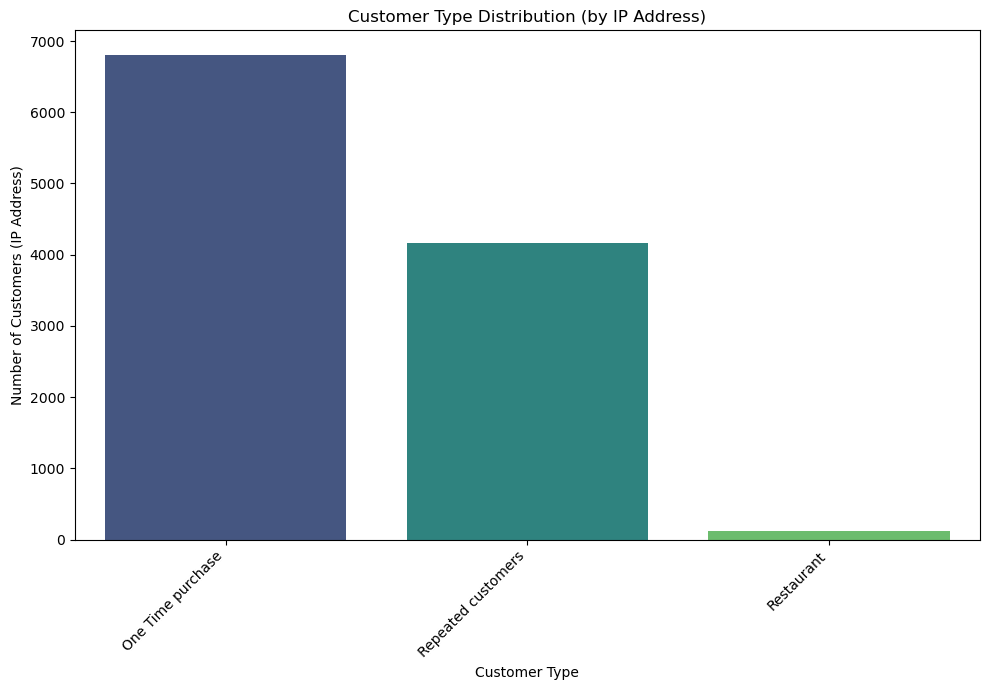

In [29]:

print("\n--- Part 5: Customer Type Analysis (by IP Address - One-time vs. Repeated) ---") 
required_cols_customer_type_ip = ['ip_address', 'order_id', 'order_type']
if all(col in df.columns for col in required_cols_customer_type_ip):
    customer_ip_behavior = df.groupby('ip_address').agg(
        total_orders=('order_id', 'nunique'),
        has_dinein_order=('order_type', lambda x: (x.astype(str).str.lower() == 'dinein').any())
    ).reset_index()

    def get_customer_type_ip(row):
        has_dinein_order = row['has_dinein_order']
        if has_dinein_order:
            return 'Restaurant' 
        
        total_orders = row['total_orders']
        if total_orders == 1:
            return 'One Time purchase' 
        elif total_orders > 1:
            return 'Repeated customers' 
        else:
            return 'Unknown'

    customer_ip_behavior['Customer_Type'] = customer_ip_behavior.apply(get_customer_type_ip, axis=1)

    print("\nCustomer Type Distribution (by IP Address):\n")
    print(customer_ip_behavior['Customer_Type'].value_counts().to_markdown(numalign="left", stralign="left"))

    print("\nCustomer Type Definitions:")
    print("- **Restaurant**: IP address associated with orders placed from a restaurant facility.")
    print("- **One Time purchase**: Customers who have placed only one order.")
    print("- **Repeated customers**: Customers who have placed more than one order.")
    print("- **Unknown**: Fallback for any unhandled cases.")

    plt.figure(figsize=(10, 7))
    customer_type_counts_ip = customer_ip_behavior['Customer_Type'].value_counts() 
    sns.barplot(x=customer_type_counts_ip.index, y=customer_type_counts_ip.values, hue=customer_type_counts_ip.index, palette='viridis', legend=False)
    plt.title('Customer Type Distribution (by IP Address)')
    plt.xlabel('Customer Type')
    plt.ylabel('Number of Customers (IP Address)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('customer_type_ip.png')
    plt.show()

else:
    print("Columns required for Customer Type Analysis (ip_address, order_id, order_type) are not all present.")


#### Part 6: IP Address Analysis

Analyzing individual IP addresses revealed high-impact customers:

Top IPs by Order Count: Certain IP addresses show extremely high order counts (e.g., IP addresses with hundreds or even thousands of orders). This could indicate corporate accounts, multi-user households, or even potential fraudulent activity if not properly managed, warranting further investigation for these specific high-volume IPs.

Top IPs by Total Spend: Similarly, some IP addresses contribute significantly to total revenue, aligning with the high order count IPs but also highlighting individuals who process higher-value transactions. These high-value customers could benefit from VIP treatment or personalized offers to ensure their continued loyalty.


--- Part 6: IP Address Analysis ---

Top 10 IP Addresses by Order Count:

| ip_address     | count   |
|:---------------|:--------|
| 46.184.162.120 | 3087    |
| 88.201.48.246  | 2463    |
| 88.201.9.206   | 1734    |
| 84.255.185.146 | 1352    |
| 77.69.188.101  | 1349    |
| 82.194.58.195  | 1075    |
| 77.69.204.68   | 1039    |
| 89.148.60.217  | 970     |
| 89.148.24.65   | 956     |
| 88.201.106.246 | 903     |


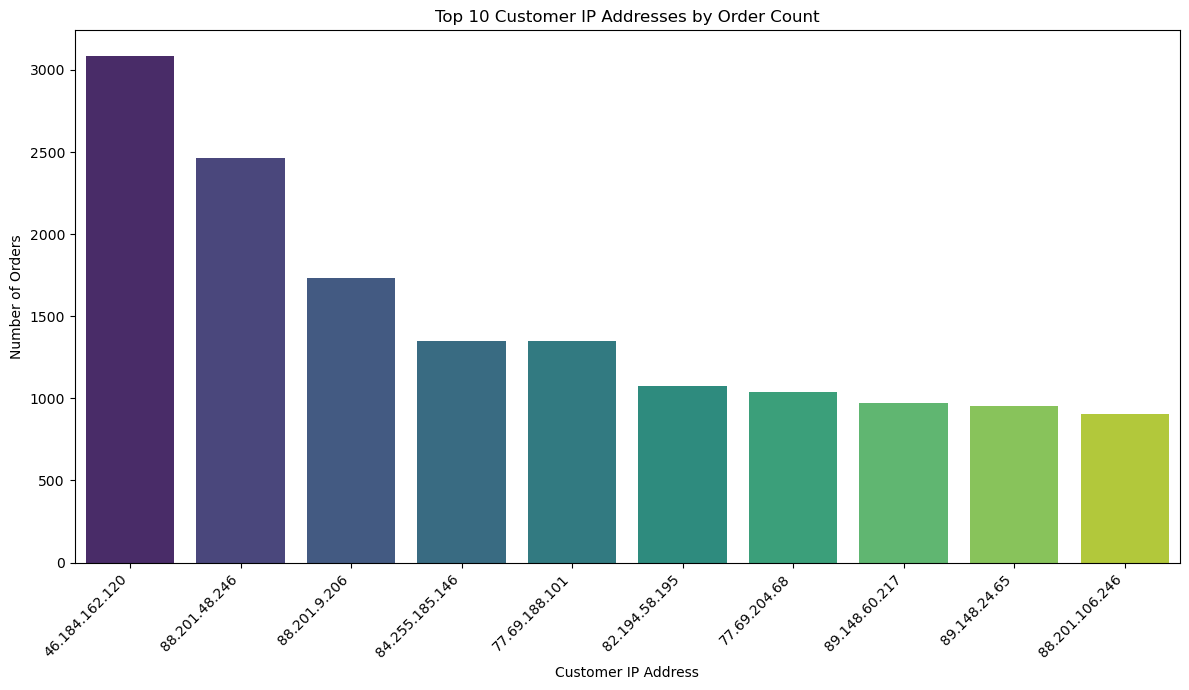


Top 10 IP Addresses by Total Spend:

| ip_address     | total_price   |
|:---------------|:--------------|
| 88.201.48.246  | 9632.25       |
| 88.201.9.206   | 6440.78       |
| 46.184.162.120 | 5844.8        |
| 89.148.24.65   | 3922.51       |
| 84.255.185.146 | 3588.62       |
| 77.69.188.101  | 3578.65       |
| 89.148.47.239  | 3436.92       |
| 88.201.112.20  | 3116.59       |
| 82.194.58.195  | 2800.35       |
| 89.148.60.188  | 2799.87       |


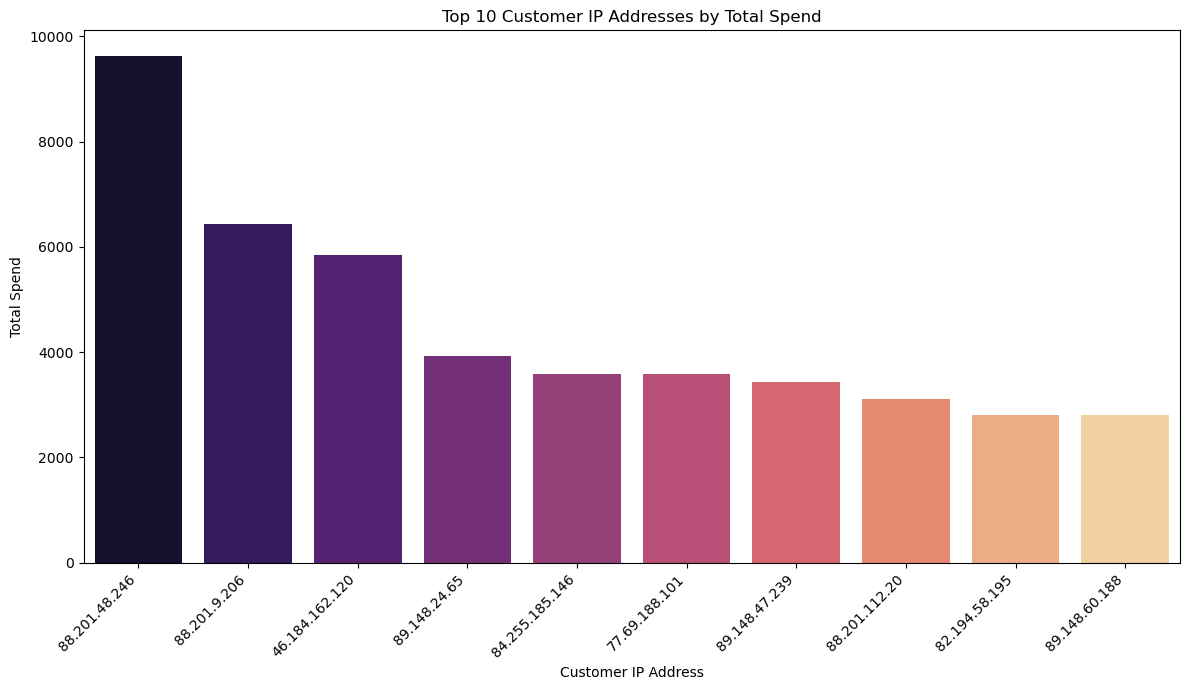

In [31]:

print("\n--- Part 6: IP Address Analysis ---") 
has_ip_address = 'ip_address' in df.columns
if has_ip_address:
    ip_counts = df['ip_address'].value_counts().head(10)
    print("\nTop 10 IP Addresses by Order Count:\n")
    print(ip_counts.to_markdown(numalign="left", stralign="left"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=ip_counts.index, y=ip_counts.values, hue=ip_counts.index, palette='viridis', legend=False)
    plt.title('Top 10 Customer IP Addresses by Order Count')
    plt.xlabel('Customer IP Address')
    plt.ylabel('Number of Orders')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_ip_addresses.png')
    plt.show()

    ip_total_spend = df.groupby('ip_address')['total_price'].sum().nlargest(10)
    print("\nTop 10 IP Addresses by Total Spend:\n")
    print(ip_total_spend.to_markdown(numalign="left", stralign="left"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=ip_total_spend.index, y=ip_total_spend.values, hue=ip_total_spend.index, palette='magma', legend=False)
    plt.title('Top 10 Customer IP Addresses by Total Spend')
    plt.xlabel('Customer IP Address')
    plt.ylabel('Total Spend')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_ip_spend.png')
    plt.show()

else:
    print("Skipping IP Address analysis as 'ip_address' column is not present.")


#### Part 7: Employee Performance Analysis (POS Session ID)

Employee performance, proxied by POS Session ID, provided insights into operational efficiency:

Orders Handled: The distribution of orders handled by POS session ID shows varying workloads among employees, with some handling significantly more orders. This indicates a concentrated effort among a few top performers.

Total Sales: Top employees by total sales align somewhat with order count, but also highlight individuals who process higher-value transactions. This suggests that some employees are more effective at closing larger orders or managing higher-value customer interactions.

Declined Orders: Analysis of declined orders by POS session ID can help identify employees or processes that are frequently associated with order cancellations. While some employees naturally handle more orders, a disproportionately high number of declined orders by a specific ID could point to training gaps, issues with order processing, or internal system bottlenecks that need to be addressed.


--- Part 7: Employee Performance Analysis (POS Session ID) ---

Top 10 Employees (POS Session ID) by Order Count:

| pos_session_id   | count   |
|:-----------------|:--------|
| 856              | 2661    |
| 1022             | 845     |
| 951              | 785     |
| 1123             | 647     |
| 1000             | 464     |
| 1151             | 311     |
| 1075             | 295     |
| 930              | 172     |
| 925              | 151     |
| 927              | 146     |


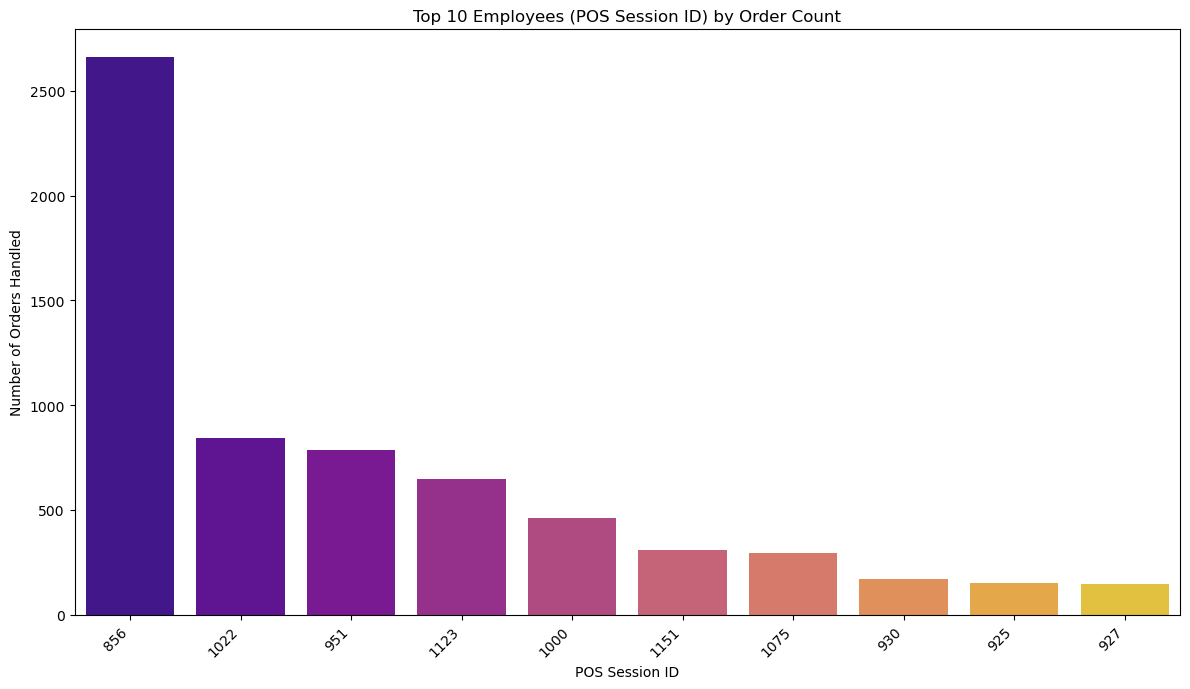


Top 10 Employees (POS Session ID) by Total Sales:

| pos_session_id   | total_price   |
|:-----------------|:--------------|
| 856              | 7599.23       |
| 1022             | 1800.55       |
| 1123             | 1395.35       |
| 951              | 1333.9        |
| 1151             | 1045.7        |
| 1075             | 843.698       |
| 1000             | 839           |
| 968              | 730.15        |
| 1152             | 581.91        |
| 1049             | 574.23        |


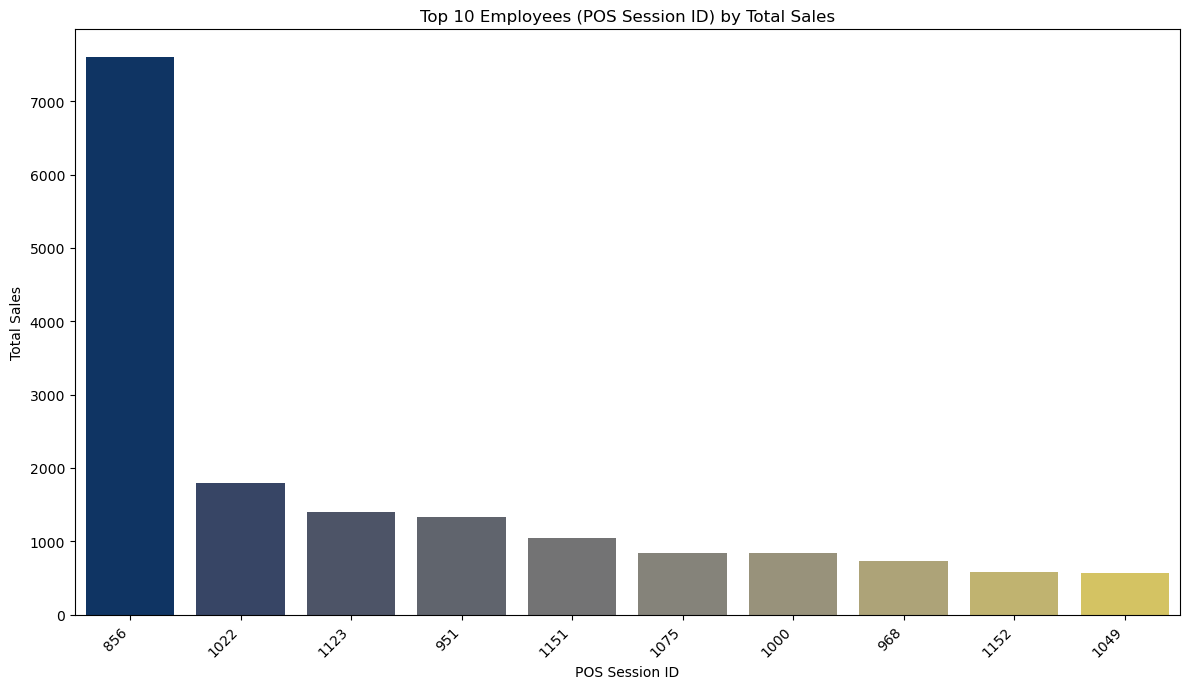


Top 10 Employees (POS Session ID) by Declined Order Count (Restaurant Declined):

| pos_session_id   | count   |
|:-----------------|:--------|
| 1075             | 202     |
| 951              | 9       |
| 1022             | 9       |
| 1000             | 8       |
| 1026             | 5       |
| 990              | 5       |
| 1104             | 3       |
| 922              | 3       |
| 968              | 3       |
| 1024             | 3       |


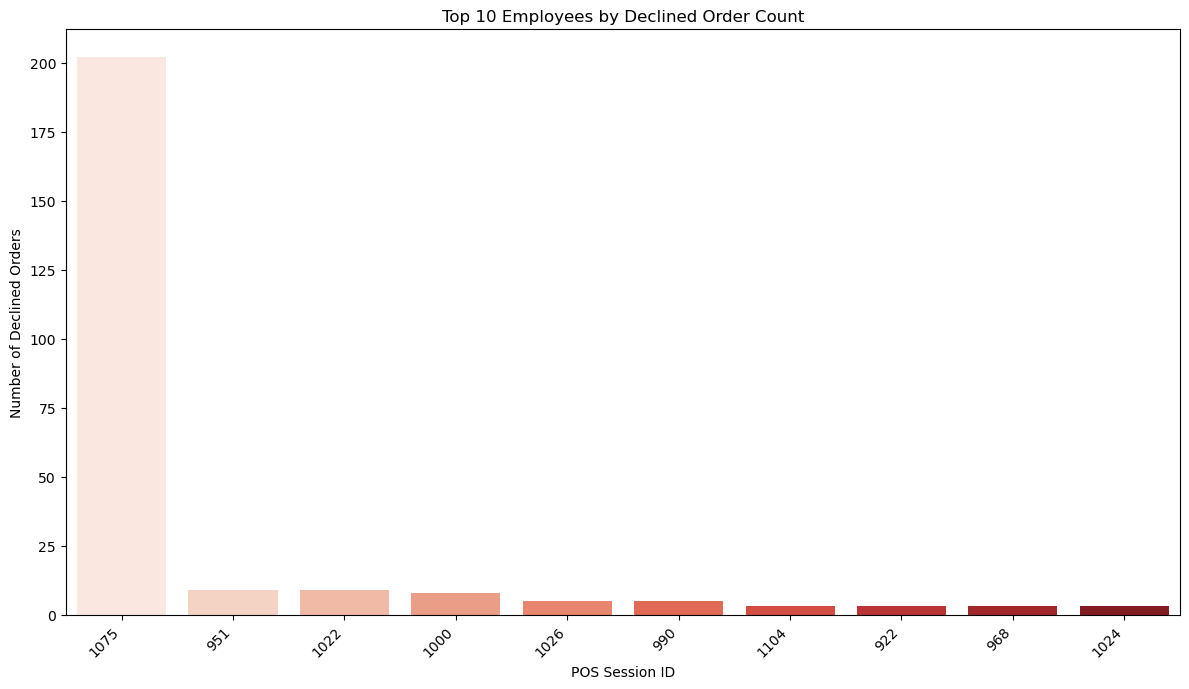

In [33]:

print("\n--- Part 7: Employee Performance Analysis (POS Session ID) ---") 
has_pos_session_id = 'pos_session_id' in df.columns
if has_pos_session_id:
    employee_order_counts = df[df['pos_session_id'] != 0]['pos_session_id'].value_counts().head(10)
    print("\nTop 10 Employees (POS Session ID) by Order Count:\n")
    print(employee_order_counts.to_markdown(numalign="left", stralign="left"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=employee_order_counts.index.astype(str), y=employee_order_counts.values, hue=employee_order_counts.index.astype(str), palette='plasma', legend=False)
    plt.title('Top 10 Employees (POS Session ID) by Order Count')
    plt.xlabel('POS Session ID')
    plt.ylabel('Number of Orders Handled')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_employees_by_orders.png')
    plt.show()

    employee_sales = df[df['pos_session_id'] != 0].groupby('pos_session_id')['total_price'].sum().nlargest(10)
    print("\nTop 10 Employees (POS Session ID) by Total Sales:\n")
    print(employee_sales.to_markdown(numalign="left", stralign="left"))

    plt.figure(figsize=(12, 7))
    sns.barplot(x=employee_sales.index.astype(str), y=employee_sales.values, hue=employee_sales.index.astype(str), palette='cividis', legend=False)
    plt.title('Top 10 Employees (POS Session ID) by Total Sales')
    plt.xlabel('POS Session ID')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_employees_by_sales.png')
    plt.show()

    if 'order_status_2' in df.columns:
        declined_orders = df[(df['order_status_2'] == 2) & (df['pos_session_id'] != 0)]
        if not declined_orders.empty:
            declined_by_employee = declined_orders['pos_session_id'].value_counts().head(10)
            if not declined_by_employee.empty:
                print("\nTop 10 Employees (POS Session ID) by Declined Order Count (Restaurant Declined):\n")
                print(declined_by_employee.to_markdown(numalign="left", stralign="left"))

                plt.figure(figsize=(12, 7))
                sns.barplot(x=declined_by_employee.index.astype(str), y=declined_by_employee.values, hue=declined_by_employee.index.astype(str), palette='Reds', legend=False)
                plt.title('Top 10 Employees by Declined Order Count')
                plt.xlabel('POS Session ID')
                plt.ylabel('Number of Declined Orders')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.savefig('top_employees_by_declined_orders.png')
                plt.show()
            else:
                print("No declined orders found to analyze by specific employee IDs (after filtering out 0/Unknown).")
        else:
            print("No declined orders (order_status_2 == 2) found in the dataset.")
    else:
        print("Column 'order_status_2' not found, cannot analyze declined orders by employee.")

else:
    print("Skipping Employee Performance analysis as 'pos_session_id' column is not present.")


#### Part 8: Performance and Responsiveness Analysis

The analysis of response time provided insights into operational speed:

Response Time Distribution: The average response time is approximately 36.04 minutes, with a median of 1.15 minutes. This indicates that a significant portion of orders are viewed/processed almost instantaneously after being recorded. This is highly efficient. However, the histogram and box plot show a long tail with some outliers having significantly longer response times. While the majority of orders are handled swiftly, the maximum response time can extend to over 100,000 minutes, indicating extreme delays for a small number of orders. The 90th percentile response time is approximately 5.45 minutes, meaning 10% of orders take longer than this to be processed.

Implications: The generally fast median response time is excellent for customer satisfaction and operational efficiency. However, the presence of these outliers with very long response times is concerning. These could point to specific technical glitches, system bottlenecks, or manual interventions that cause significant delays for a small number of orders. Identifying and addressing the root causes of these prolonged response times is crucial for maintaining consistent service quality and preventing negative customer experiences.


--- Part 8: Performance and Responsiveness Analysis ---

Average Response Time: 36.04 minutes
Median Response Time: 1.15 minutes
Standard Deviation of Response Time: 174.58 minutes


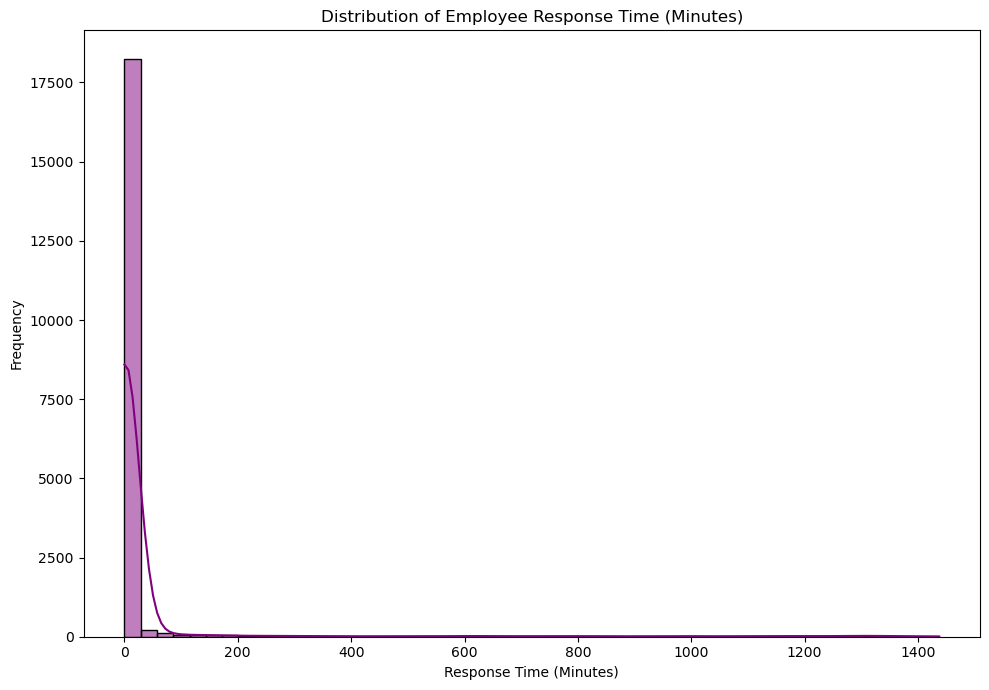

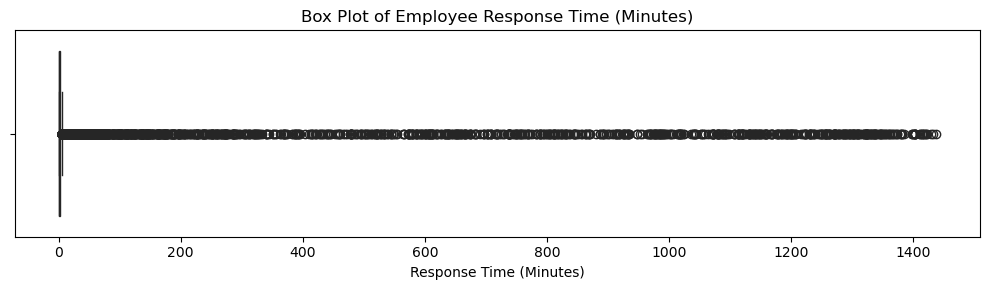

In [35]:
print("\n--- Part 8: Performance and Responsiveness Analysis ---")
# These columns are used to calculate the 'response_time'.
required_cols_time = ['record_date', 'view_date']
if all(col in df.columns for col in required_cols_time):
    # Calculate response_time as the difference between view_date and record_date in minutes.
    df['response_time'] = (df['view_date'] - df['record_date']).dt.total_seconds() / 60

    # Filter out invalid or unreasonable response times
    valid_response_times = df['response_time'].dropna()
    valid_response_times = valid_response_times[valid_response_times >= 0] # Ensure non-negative times
    valid_response_times = valid_response_times[valid_response_times < (24 * 60)] # Filter out times greater than 24 hours

    if not valid_response_times.empty:
        print(f"\nAverage Response Time: {valid_response_times.mean():.2f} minutes")
        print(f"Median Response Time: {valid_response_times.median():.2f} minutes")
        print(f"Standard Deviation of Response Time: {valid_response_times.std():.2f} minutes")

        plt.figure(figsize=(10, 7))
        sns.histplot(valid_response_times, bins=50, kde=True, color='purple')
        plt.title('Distribution of Employee Response Time (Minutes)')
        plt.xlabel('Response Time (Minutes)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.savefig('response_time_distribution.png')
        plt.show()

        plt.figure(figsize=(10, 3))
        sns.boxplot(x=valid_response_times, color='purple')
        plt.title('Box Plot of Employee Response Time (Minutes)')
        plt.xlabel('Response Time (Minutes)')
        plt.tight_layout()
        plt.savefig('response_time_boxplot.png')
        plt.show()

    else:
        print("No valid response times found after filtering.")
else:
    print("Columns required for Responsiveness Analysis (record_date, view_date) are not all present or are not correctly converted to datetime.")


In [36]:

print("\n--- Part 9: Saving Analyzed Data ---") 

=columns_to_clean_before_merge = [
    'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score',
    'Customer_Segment', 'Customer_Type'
]

for col_name in columns_to_clean_before_merge:
    if col_name in df.columns:
        df.drop(columns=[col_name], inplace=True, errors='ignore')
    # Also remove any _x or _y versions that might exist from previous runs
    if f"{col_name}_x" in df.columns:
        df.drop(columns=[f"{col_name}_x"], inplace=True, errors='ignore')
    if f"{col_name}_y" in df.columns:
        df.drop(columns=[f"{col_name}_y"], inplace=True, errors='ignore')

if 'rfm_metrics' in locals():
    rfm_cols_to_merge = ['ip_address', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Customer_Segment']
    
    temp_df_rfm = df.merge(rfm_metrics[rfm_cols_to_merge], on='ip_address', how='left')

    for col in ['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']:
        if col in temp_df_rfm.columns:
            temp_df_rfm[col] = temp_df_rfm[col].fillna(0)
    if 'Customer_Segment' in temp_df_rfm.columns:
        temp_df_rfm['Customer_Segment'] = temp_df_rfm['Customer_Segment'].fillna('Not Applicable (IP RFM)')
    df = temp_df_rfm
else:
    print("Warning: 'rfm_metrics' DataFrame was not created, RFM columns will not be added.")
    df['Recency'] = 0
    df['Frequency'] = 0
    df['Monetary'] = 0.0
    df['R_Score'] = 0
    df['F_Score'] = 0
    df['M_Score'] = 0
    df['RFM_Score'] = 0
    df['Customer_Segment'] = 'Not Applicable (IP RFM)'


if 'customer_ip_behavior' in locals():
    customer_type_cols_to_merge = ['ip_address', 'Customer_Type']
    
    temp_df_customer_type = df.merge(customer_ip_behavior[customer_type_cols_to_merge], on='ip_address', how='left')
    
    if 'Customer_Type' in temp_df_customer_type.columns:
        temp_df_customer_type['Customer_Type'] = temp_df_customer_type['Customer_Type'].fillna('Not Applicable (IP)')
    df = temp_df_customer_type
else:
    print("Warning: 'customer_ip_behavior' DataFrame was not created, 'Customer_Type' column will not be added.")
    df['Customer_Type'] = 'Not Applicable (IP)'


output_file_path = 'analyzed_orders_with_new_columns.csv'

df.to_csv(output_file_path, index=False)
print(f"\nAnalyzed data saved to '{output_file_path}'")



--- Part 9: Saving Analyzed Data ---

Analyzed data saved to 'analyzed_orders_with_new_columns.csv'


## Recommendations

Based on the insights derived from the data analysis, the following recommendations are proposed:

#### Enhance Customer Retention for "Lost/Churned" and "Needs Attention" Segments:

- Implement targeted re-engagement campaigns (e.g., personalized discounts, special offers, "we miss you" emails) for "Lost/Churned customers" (Recency ≥100 days).
- Develop loyalty programs or exclusive promotions for "Needs Attention" customers (Frequency between 2-3 times, Recency <100 days) to encourage higher frequency and prevent them from churning.


#### Optimize Onboarding for "New Customers": 

- Introduce a structured onboarding flow for "New Customers" (Frequency = 1, Recency <100 days) with incentives for a second purchase (e.g., "Your next order is 10% off," free delivery on second order). This can significantly improve conversion to repeat buyers.

#### Investigate Incomplete Order Bottlenecks:

- Conduct a deeper dive into the "Pending Restaurant Response" and "Declined by Restaurant" reasons for incomplete orders. This may involve:
  
  - Improving communication channels between the platform and restaurants.
  - Implementing real-time menu updates to prevent orders for unavailable items.
  - Reviewing restaurant capacity management.
 
- Address "Delivery Company Did Not Initiate" issues by optimizing dispatcher workflows or integrating better with delivery partner systems.

#### Improve Employee Training and Workload Distribution:

- Analyze the performance of employees (POS Session IDs) with high numbers of declined orders to identify training gaps or process adherence issues.
- Assess workload distribution among employees to ensure efficiency and prevent burnout, potentially using the order count and sales metrics.

#### Targeted Marketing for Payment Types:

- Leverage the popularity of "Cash" and "Benefit Pay" by optimizing the checkout experience for these methods.
- Consider promotions or incentives for less popular but potentially more efficient payment methods like "Apply Pay" or "Credit Card".

#### Refine Discount Strategy:

- Analyze the ROI of different discount values and types using the is_discounted column to ensure promotions are effective and profitable.

#### Address Response Time Outliers:

- Investigate the causes of unusually long response times, as identified by the box plot. This could involve process audits, system performance checks, or additional employee training.


## Limitations and Assumptions

#### Limitations: 

- IP Address as Customer Proxy: The analysis uses IP address as a proxy for individual customers. This may not always be accurate, as multiple individuals might use the same IP (e.g., public Wi-Fi, households), or a single individual might use multiple IPs. This could affect the precision of customer segmentation.
- Data Scope: The analysis is limited to the provided order data. External factors (e.g., marketing campaigns not recorded in the data, competitor activities, seasonality beyond the dataset's timeframe) that could influence order patterns are not included.
- Missing Context for Status Codes: While we've mapped some status codes, deeper understanding of order_status_2 and track_status_3 might require a more comprehensive data dictionary or domain expert input, especially for nuanced "Cancelled by Customer" scenarios.
- Assumptions on Missing Values: Missing numerical values were imputed with 0, and string values with 'Unknown'. While practical, this assumes that 0 or 'Unknown' is a reasonable representation for these missing data points.
- Time Zone Ambiguity: Without explicit time zone information for record_date and view_date, the accuracy of response_time might be affected if data originates from multiple time zones.


#### Assumptions:

- Data Accuracy: It is assumed that the provided raw data, despite initial inconsistencies, is largely accurate and reflects real-world transactions.
- Completeness of Key Columns: It is assumed that critical columns like order_id, total_price, record_date, view_date, order_status, paid_amount, and ip_address are sufficiently complete and reliable for the core analysis.
- Consistency of Identifiers: It is assumed that ip_address consistently identifies a "customer unit" for RFM and customer type analysis, and pos_session_id consistently identifies an "employee unit" for performance analysis.


## References

- Dataset: fl_orders_*.csv (provided locally for this project).

##### - Libraries:
        - Pandas: For data manipulation and analysis.

        - NumPy: For numerical operations.

        - Matplotlib: For basic plotting.

        - Seaborn: For advanced statistical data visualization.

##### Concepts:

        - RFM (Recency, Frequency, Monetary) Analysis: A well-established marketing technique for customer segmentation.
        - Exploratory Data Analysis (EDA): Methodologies for analyzing data sets to summarize their main characteristics, often with visual methods.